In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [3]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [4]:
NUM_CLASSES = 2

# Dataset reading

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2 * 2) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 84)                0         
                                                                 
 dense (Dense)               (None, 20)                1700      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 2)                 22        
                                                                 
Total params: 1932 (7.55 KB)
Trainable params: 1932 (7.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/1 [==============================] - ETA: 0s - loss: 0.8848 - accuracy: 0.4933
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 1s 1s/step - loss: 0.8848 - accuracy: 0.4933 - val_loss: 0.8421 - val_accuracy: 0.4400
Epoch 2/1000
1/1 [==============================] - ETA: 0s - loss: 0.9080 - accuracy: 0.4533
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 62ms/step - loss: 0.9080 - accuracy: 0.4533 - val_loss: 0.8020 - val_accuracy: 0.4400
Epoch 3/1000
1/1 [==============================] - ETA: 0s - loss: 0.8196 - accuracy: 0.4800
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 70ms/step - loss: 0.8196 - accuracy: 0.4800 - val_loss: 0.7637 - val_accuracy: 0.4400


C:\Users\Sanjay\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 4/1000
1/1 [==============================] - ETA: 0s - loss: 0.8011 - accuracy: 0.4800
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 76ms/step - loss: 0.8011 - accuracy: 0.4800 - val_loss: 0.7314 - val_accuracy: 0.4400
Epoch 5/1000
1/1 [==============================] - ETA: 0s - loss: 0.7199 - accuracy: 0.4800
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 70ms/step - loss: 0.7199 - accuracy: 0.4800 - val_loss: 0.7083 - val_accuracy: 0.4400
Epoch 6/1000
1/1 [==============================] - ETA: 0s - loss: 0.6768 - accuracy: 0.4933
Epoch 6: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 67ms/step - loss: 0.6768 - accuracy: 0.4933 - val_loss: 0.6905 - val_accuracy: 0.4400
Epoch 7/1000
1/1 [==============================] - ETA: 0s - loss: 0.6625 - accuracy: 0.4800
Epoch 7: sav

1/1 [==============================] - 0s 66ms/step - loss: 0.4672 - accuracy: 0.6933 - val_loss: 0.4315 - val_accuracy: 0.8000
Epoch 32/1000
1/1 [==============================] - ETA: 0s - loss: 0.4724 - accuracy: 0.6800
Epoch 32: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 64ms/step - loss: 0.4724 - accuracy: 0.6800 - val_loss: 0.4218 - val_accuracy: 0.8400
Epoch 33/1000
1/1 [==============================] - ETA: 0s - loss: 0.4428 - accuracy: 0.7067
Epoch 33: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 71ms/step - loss: 0.4428 - accuracy: 0.7067 - val_loss: 0.4124 - val_accuracy: 0.8800
Epoch 34/1000
1/1 [==============================] - ETA: 0s - loss: 0.4538 - accuracy: 0.7200
Epoch 34: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 69ms/step - loss: 0.4538 - accuracy: 0.7200 - val_loss: 0.

Epoch 59/1000
1/1 [==============================] - ETA: 0s - loss: 0.2724 - accuracy: 0.9200
Epoch 59: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 59ms/step - loss: 0.2724 - accuracy: 0.9200 - val_loss: 0.1856 - val_accuracy: 1.0000
Epoch 60/1000
1/1 [==============================] - ETA: 0s - loss: 0.2269 - accuracy: 0.9600
Epoch 60: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 65ms/step - loss: 0.2269 - accuracy: 0.9600 - val_loss: 0.1785 - val_accuracy: 1.0000
Epoch 61/1000
1/1 [==============================] - ETA: 0s - loss: 0.2345 - accuracy: 0.9867
Epoch 61: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 71ms/step - loss: 0.2345 - accuracy: 0.9867 - val_loss: 0.1714 - val_accuracy: 1.0000
Epoch 62/1000
1/1 [==============================] - ETA: 0s - loss: 0.2531 - accuracy: 0.9467
Epoch

1/1 [==============================] - ETA: 0s - loss: 0.1312 - accuracy: 0.9733
Epoch 86: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 76ms/step - loss: 0.1312 - accuracy: 0.9733 - val_loss: 0.0533 - val_accuracy: 1.0000
Epoch 87/1000
1/1 [==============================] - ETA: 0s - loss: 0.1134 - accuracy: 0.9867
Epoch 87: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 65ms/step - loss: 0.1134 - accuracy: 0.9867 - val_loss: 0.0508 - val_accuracy: 1.0000
Epoch 88/1000
1/1 [==============================] - ETA: 0s - loss: 0.1055 - accuracy: 0.9733
Epoch 88: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 74ms/step - loss: 0.1055 - accuracy: 0.9733 - val_loss: 0.0483 - val_accuracy: 1.0000
Epoch 89/1000
1/1 [==============================] - ETA: 0s - loss: 0.0933 - accuracy: 1.0000
Epoch 89: saving mo

1/1 [==============================] - ETA: 0s - loss: 0.0415 - accuracy: 1.0000
Epoch 113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 60ms/step - loss: 0.0415 - accuracy: 1.0000 - val_loss: 0.0155 - val_accuracy: 1.0000
Epoch 114/1000
1/1 [==============================] - ETA: 0s - loss: 0.0537 - accuracy: 1.0000
Epoch 114: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 67ms/step - loss: 0.0537 - accuracy: 1.0000 - val_loss: 0.0148 - val_accuracy: 1.0000
Epoch 115/1000
1/1 [==============================] - ETA: 0s - loss: 0.0868 - accuracy: 0.9867
Epoch 115: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 63ms/step - loss: 0.0868 - accuracy: 0.9867 - val_loss: 0.0142 - val_accuracy: 1.0000
Epoch 116/1000
1/1 [==============================] - ETA: 0s - loss: 0.0517 - accuracy: 0.9867
Epoch 116: sa

1/1 [==============================] - ETA: 0s - loss: 0.0310 - accuracy: 1.0000
Epoch 140: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 67ms/step - loss: 0.0310 - accuracy: 1.0000 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 141/1000
1/1 [==============================] - ETA: 0s - loss: 0.0318 - accuracy: 1.0000
Epoch 141: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 67ms/step - loss: 0.0318 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 142/1000
1/1 [==============================] - ETA: 0s - loss: 0.0784 - accuracy: 0.9600
Epoch 142: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 76ms/step - loss: 0.0784 - accuracy: 0.9600 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 143/1000
1/1 [==============================] - ETA: 0s - loss: 0.0224 - accuracy: 1.0000
Epoch 143: sa

1/1 [==============================] - ETA: 0s - loss: 0.0279 - accuracy: 1.0000
Epoch 167: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 69ms/step - loss: 0.0279 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 168/1000
1/1 [==============================] - ETA: 0s - loss: 0.0235 - accuracy: 1.0000
Epoch 168: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 66ms/step - loss: 0.0235 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 169/1000
1/1 [==============================] - ETA: 0s - loss: 0.0128 - accuracy: 1.0000
Epoch 169: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 69ms/step - loss: 0.0128 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 170/1000
1/1 [==============================] - ETA: 0s - loss: 0.0443 - accuracy: 0.9733
Epoch 170: sa

1/1 [==============================] - ETA: 0s - loss: 0.0200 - accuracy: 1.0000
Epoch 194: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 74ms/step - loss: 0.0200 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 195/1000
1/1 [==============================] - ETA: 0s - loss: 0.0185 - accuracy: 1.0000
Epoch 195: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 75ms/step - loss: 0.0185 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 196/1000
1/1 [==============================] - ETA: 0s - loss: 0.0074 - accuracy: 1.0000
Epoch 196: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 68ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 197/1000
1/1 [==============================] - ETA: 0s - loss: 0.0189 - accuracy: 1.0000
Epoch 197: sa

1/1 [==============================] - ETA: 0s - loss: 0.0158 - accuracy: 1.0000
Epoch 221: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 64ms/step - loss: 0.0158 - accuracy: 1.0000 - val_loss: 8.7745e-04 - val_accuracy: 1.0000
Epoch 222/1000
1/1 [==============================] - ETA: 0s - loss: 0.0215 - accuracy: 1.0000
Epoch 222: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 60ms/step - loss: 0.0215 - accuracy: 1.0000 - val_loss: 8.5488e-04 - val_accuracy: 1.0000
Epoch 223/1000
1/1 [==============================] - ETA: 0s - loss: 0.0139 - accuracy: 1.0000
Epoch 223: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 69ms/step - loss: 0.0139 - accuracy: 1.0000 - val_loss: 8.3484e-04 - val_accuracy: 1.0000
Epoch 224/1000
1/1 [==============================] - ETA: 0s - loss: 0.0125 - accuracy: 1.0000
E

Epoch 248/1000
1/1 [==============================] - ETA: 0s - loss: 0.0235 - accuracy: 0.9867
Epoch 248: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 65ms/step - loss: 0.0235 - accuracy: 0.9867 - val_loss: 4.7489e-04 - val_accuracy: 1.0000
Epoch 249/1000
1/1 [==============================] - ETA: 0s - loss: 0.0189 - accuracy: 1.0000
Epoch 249: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 58ms/step - loss: 0.0189 - accuracy: 1.0000 - val_loss: 4.7068e-04 - val_accuracy: 1.0000
Epoch 250/1000
1/1 [==============================] - ETA: 0s - loss: 0.0069 - accuracy: 1.0000
Epoch 250: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 64ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 4.6577e-04 - val_accuracy: 1.0000
Epoch 251/1000
1/1 [==============================] - ETA: 0s - loss: 0.0275 - acc

Epoch 275/1000
1/1 [==============================] - ETA: 0s - loss: 0.0145 - accuracy: 1.0000
Epoch 275: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 79ms/step - loss: 0.0145 - accuracy: 1.0000 - val_loss: 3.6298e-04 - val_accuracy: 1.0000
Epoch 276/1000
1/1 [==============================] - ETA: 0s - loss: 0.0114 - accuracy: 1.0000
Epoch 276: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 70ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 3.5827e-04 - val_accuracy: 1.0000
Epoch 277/1000
1/1 [==============================] - ETA: 0s - loss: 0.0167 - accuracy: 0.9867
Epoch 277: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 64ms/step - loss: 0.0167 - accuracy: 0.9867 - val_loss: 3.5558e-04 - val_accuracy: 1.0000
Epoch 278/1000
1/1 [==============================] - ETA: 0s - loss: 0.0104 - acc

Epoch 302/1000
1/1 [==============================] - ETA: 0s - loss: 0.0096 - accuracy: 1.0000
Epoch 302: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 79ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 2.5064e-04 - val_accuracy: 1.0000
Epoch 303/1000
1/1 [==============================] - ETA: 0s - loss: 0.0112 - accuracy: 1.0000
Epoch 303: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 90ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 2.4564e-04 - val_accuracy: 1.0000
Epoch 304/1000
1/1 [==============================] - ETA: 0s - loss: 0.0071 - accuracy: 1.0000
Epoch 304: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 72ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 2.4052e-04 - val_accuracy: 1.0000
Epoch 305/1000
1/1 [==============================] - ETA: 0s - loss: 0.0142 - acc

Epoch 329/1000
1/1 [==============================] - ETA: 0s - loss: 0.0032 - accuracy: 1.0000
Epoch 329: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 69ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.8272e-04 - val_accuracy: 1.0000
Epoch 330/1000
1/1 [==============================] - ETA: 0s - loss: 0.0046 - accuracy: 1.0000
Epoch 330: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 61ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 1.8283e-04 - val_accuracy: 1.0000
Epoch 331/1000
1/1 [==============================] - ETA: 0s - loss: 0.0288 - accuracy: 0.9867
Epoch 331: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 70ms/step - loss: 0.0288 - accuracy: 0.9867 - val_loss: 1.8241e-04 - val_accuracy: 1.0000
Epoch 332/1000
1/1 [==============================] - ETA: 0s - loss: 0.0106 - acc

Epoch 356/1000
1/1 [==============================] - ETA: 0s - loss: 0.0051 - accuracy: 1.0000
Epoch 356: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 70ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 1.1240e-04 - val_accuracy: 1.0000
Epoch 357/1000
1/1 [==============================] - ETA: 0s - loss: 0.0106 - accuracy: 1.0000
Epoch 357: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 63ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 1.1100e-04 - val_accuracy: 1.0000
Epoch 358/1000
1/1 [==============================] - ETA: 0s - loss: 0.0040 - accuracy: 1.0000
Epoch 358: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 81ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.0949e-04 - val_accuracy: 1.0000
Epoch 359/1000
1/1 [==============================] - ETA: 0s - loss: 0.0063 - acc

Epoch 383/1000
1/1 [==============================] - ETA: 0s - loss: 0.0082 - accuracy: 1.0000
Epoch 383: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 72ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 7.6391e-05 - val_accuracy: 1.0000
Epoch 384/1000
1/1 [==============================] - ETA: 0s - loss: 0.0045 - accuracy: 1.0000
Epoch 384: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 66ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 7.5175e-05 - val_accuracy: 1.0000
Epoch 385/1000
1/1 [==============================] - ETA: 0s - loss: 0.0037 - accuracy: 1.0000
Epoch 385: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 68ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 7.4103e-05 - val_accuracy: 1.0000
Epoch 386/1000
1/1 [==============================] - ETA: 0s - loss: 0.0066 - acc

Epoch 410/1000
1/1 [==============================] - ETA: 0s - loss: 0.0086 - accuracy: 1.0000
Epoch 410: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 65ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 4.7483e-05 - val_accuracy: 1.0000
Epoch 411/1000
1/1 [==============================] - ETA: 0s - loss: 0.0086 - accuracy: 1.0000
Epoch 411: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 80ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 4.6882e-05 - val_accuracy: 1.0000
Epoch 412/1000
1/1 [==============================] - ETA: 0s - loss: 0.0058 - accuracy: 1.0000
Epoch 412: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 78ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 4.6339e-05 - val_accuracy: 1.0000
Epoch 413/1000
1/1 [==============================] - ETA: 0s - loss: 0.0011 - acc

Epoch 437/1000
1/1 [==============================] - ETA: 0s - loss: 0.0033 - accuracy: 1.0000
Epoch 437: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 68ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 3.3376e-05 - val_accuracy: 1.0000
Epoch 438/1000
1/1 [==============================] - ETA: 0s - loss: 0.0049 - accuracy: 1.0000
Epoch 438: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 66ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 3.2980e-05 - val_accuracy: 1.0000
Epoch 439/1000
1/1 [==============================] - ETA: 0s - loss: 0.0025 - accuracy: 1.0000
Epoch 439: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 72ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 3.2561e-05 - val_accuracy: 1.0000
Epoch 440/1000
1/1 [==============================] - ETA: 0s - loss: 0.0068 - acc

Epoch 464/1000
1/1 [==============================] - ETA: 0s - loss: 0.0158 - accuracy: 0.9867
Epoch 464: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 74ms/step - loss: 0.0158 - accuracy: 0.9867 - val_loss: 2.3087e-05 - val_accuracy: 1.0000
Epoch 465/1000
1/1 [==============================] - ETA: 0s - loss: 0.0034 - accuracy: 1.0000
Epoch 465: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 65ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 2.2773e-05 - val_accuracy: 1.0000
Epoch 466/1000
1/1 [==============================] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 466: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 74ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.2463e-05 - val_accuracy: 1.0000
Epoch 467/1000
1/1 [==============================] - ETA: 0s - loss: 0.0013 - acc

Epoch 491/1000
1/1 [==============================] - ETA: 0s - loss: 0.0041 - accuracy: 1.0000
Epoch 491: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 66ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 1.9597e-05 - val_accuracy: 1.0000
Epoch 492/1000
1/1 [==============================] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 492: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 72ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.9344e-05 - val_accuracy: 1.0000
Epoch 493/1000
1/1 [==============================] - ETA: 0s - loss: 0.0058 - accuracy: 1.0000
Epoch 493: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 71ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 1.9096e-05 - val_accuracy: 1.0000
Epoch 494/1000
1/1 [==============================] - ETA: 0s - loss: 0.0017 - acc

Epoch 518/1000
1/1 [==============================] - ETA: 0s - loss: 0.0028 - accuracy: 1.0000
Epoch 518: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 78ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 1.6493e-05 - val_accuracy: 1.0000
Epoch 519/1000
1/1 [==============================] - ETA: 0s - loss: 0.0058 - accuracy: 1.0000
Epoch 519: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 73ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 1.6398e-05 - val_accuracy: 1.0000
Epoch 520/1000
1/1 [==============================] - ETA: 0s - loss: 4.2813e-04 - accuracy: 1.0000
Epoch 520: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 58ms/step - loss: 4.2813e-04 - accuracy: 1.0000 - val_loss: 1.6331e-05 - val_accuracy: 1.0000
Epoch 521/1000
1/1 [==============================] - ETA: 0s - loss: 0.00

Epoch 545/1000
1/1 [==============================] - ETA: 0s - loss: 0.0070 - accuracy: 1.0000
Epoch 545: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 61ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 1.1549e-05 - val_accuracy: 1.0000
Epoch 546/1000
1/1 [==============================] - ETA: 0s - loss: 0.0040 - accuracy: 1.0000
Epoch 546: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 56ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.1306e-05 - val_accuracy: 1.0000
Epoch 547/1000
1/1 [==============================] - ETA: 0s - loss: 0.0020 - accuracy: 1.0000
Epoch 547: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 69ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 1.1062e-05 - val_accuracy: 1.0000
Epoch 548/1000
1/1 [==============================] - ETA: 0s - loss: 0.0038 - acc

Epoch 572/1000
1/1 [==============================] - ETA: 0s - loss: 0.0057 - accuracy: 1.0000
Epoch 572: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 72ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 9.3315e-06 - val_accuracy: 1.0000
Epoch 573/1000
1/1 [==============================] - ETA: 0s - loss: 8.7776e-04 - accuracy: 1.0000
Epoch 573: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 69ms/step - loss: 8.7776e-04 - accuracy: 1.0000 - val_loss: 9.3410e-06 - val_accuracy: 1.0000
Epoch 574/1000
1/1 [==============================] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 574: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 70ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 9.3315e-06 - val_accuracy: 1.0000
Epoch 575/1000
1/1 [==============================] - ETA: 0s - loss: 5.39

Epoch 599/1000
1/1 [==============================] - ETA: 0s - loss: 4.0387e-04 - accuracy: 1.0000
Epoch 599: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 70ms/step - loss: 4.0387e-04 - accuracy: 1.0000 - val_loss: 9.7177e-06 - val_accuracy: 1.0000
Epoch 600/1000
1/1 [==============================] - ETA: 0s - loss: 0.0068 - accuracy: 1.0000
Epoch 600: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 65ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 9.8321e-06 - val_accuracy: 1.0000
Epoch 601/1000
1/1 [==============================] - ETA: 0s - loss: 0.0042 - accuracy: 1.0000
Epoch 601: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
1/1 [==============================] - 0s 61ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 9.9418e-06 - val_accuracy: 1.0000
Epoch 602/1000
1/1 [==============================] - ETA: 0s - loss: 0.00

In [13]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 26ms/step - loss: 9.8655e-06 - accuracy: 1.0000


In [14]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [15]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 131ms/step
[1.8124696e-07 9.9999976e-01]
1


# Confusion matrix

1/1 [==============================] - 0s 22ms/step


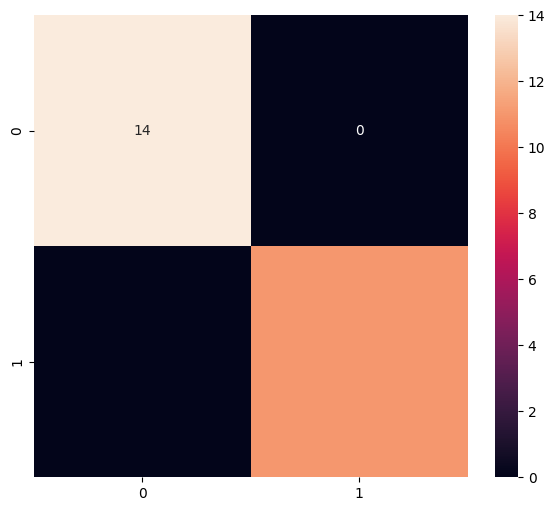

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        11

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [17]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

C:\Users\Sanjay\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Sanjay\AppData\Local\Temp\tmpf9vollor\assets


INFO:tensorflow:Assets written to: C:\Users\Sanjay\AppData\Local\Temp\tmpf9vollor\assets


4880

# Inference test

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [20]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 2.52 ms


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.8100359e-07 9.9999976e-01]
1
